In [1]:
import data_prep
import textrank
import evaluation
import cluster
import glob
%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     /home/gusklezju@GU.GU.SE/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gusklezju@GU.GU.SE/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#path_to_data = "../CNN_corpus"
files = glob.glob("data/texts/*")

In [3]:
# read files into dataframes
texts_df, summaries_df = data_prep.get_data(files)

In [4]:
texts_df.head()
#summaries_df.head()

,filename,text_num,text
0,data/texts/train_000.bin,1,editor s note in our behind the scenes serie...
1,data/texts/train_000.bin,2,london england lrb reuters rrb harry potter ...
2,data/texts/train_000.bin,3,minneapolis minnesota lrb cnn rrb drivers w...
3,data/texts/train_000.bin,4,baghdad iraq lrb cnn rrb dressed in a super...
4,data/texts/train_000.bin,5,washington lrb cnn rrb doctors removed five s...


In [5]:
# check if data was read in correctly
data_prep.check_data(texts_df, summaries_df)

check complete


In [6]:
# get a random sample to test summarizer on
r_text, r_summary = data_prep.random_sample(texts_df, summaries_df)

file: data/texts/train_000.bin
article: denver  colorado lrb cnn rrb  on a good day  keri christensen spends the day watching her children . she prepares their meals  gets them ready for school and helps them with their homework . keri christensen was nearly a victim of a roadside bombing in iraq when the convoy in front of hers was hit . but this housewife and mother of two is far different than most of the women living in her denver  colorado  suburb . she s an iraqi war veteran  among the first women in the united states to be classified as combat veterans . even though she s been home from the war for more than 2 12 years  she s now fighting another battle  this one with depression  nightmares  sleeplessness and anger . she says all of it is caused by her time in iraq .  i start feeling those feelings of  i m not worthy . i ca nt raise my family    christensen said . women have made up about 11 percent of the military force in iraq and afghanistan in the past six years  according t

In [7]:
# load pre-trained embeddings for textrank 
embs = textrank.get_embeddings("../glove.6B.100d.txt")

loaded embeddings


In [8]:
# summarize random sample with textrank
r_sum_textrank = textrank.get_summary([r_text], embs, 3)

she says all of it is caused by her time in iraq . when you are in a war zone  your survival depends on people watching your back and on unit cohesion   westrup said . am i going to make it    christensen says that she was sexually harassed by a superior while serving in iraq and that the harassment added to the pressure created by just being in a war zone . 


In [9]:
# summarize sample with cluster/skipthoughts
r_sum_cluster = cluster.get_summary([r_text], 3)

/usr/local/lib64/python3.7/site-packages/torch/nn/modules/rnn.py:61: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


women have made up about 11 percent of the military force in iraq and afghanistan in the past six years  according to the department of defense  that s an estimated 180000 women in the war zone . when you are in a war zone  your survival depends on people watching your back and on unit cohesion   westrup said . christensen receives counseling and group therapy sponsored by the va. .


In [10]:
# original summary for comparison
r_summary

's dept. of veterans affairs diagnosed 60000 veterans with ptsd . s s women have comprised 11 percent of military force in iraq and afghanistan . s s va  22 percent of women  1 percent of men suffered sexual trauma in military . s s expert says women afraid to report sexual harassment for fear of retribution . s'

In [11]:
# calculate rouge score for textrank example
tr = evaluation.get_rouge(r_sum_textrank, [r_summary])

{'rouge-1': {'f': 0.12799999507200022, 'p': 0.11428571428571428, 'r': 0.14545454545454545}, 'rouge-2': {'f': 0.03252032027761328, 'p': 0.028985507246376812, 'r': 0.037037037037037035}, 'rouge-l': {'f': 0.16091953537851778, 'p': 0.13725490196078433, 'r': 0.19444444444444445}}


In [12]:
# calculate rouge score for cluster/skipthough example
cl= evaluation.get_rouge(r_sum_cluster, [r_summary])

{'rouge-1': {'f': 0.27642275928349536, 'p': 0.25, 'r': 0.3090909090909091}, 'rouge-2': {'f': 0.1322314000163925, 'p': 0.11940298507462686, 'r': 0.14814814814814814}, 'rouge-l': {'f': 0.3146067367554602, 'p': 0.2641509433962264, 'r': 0.3888888888888889}}


In [13]:
# extract smaller datasets for evaluation (for efficiency/time reasons)
texts_s = texts_df[-1000:]
summaries_s = summaries_df[-1000:]

In [14]:
# calculate average score with textrank
tr_overall = evaluation.rouge_overall_textrank(texts_s, summaries_s, embs)

earlier this month  afghan lawmakers directly accused pakistan s isi in connection with a string of attacks in afghanistan . lrb cnn rrb  the united states believes that some members of pakistan s spy service provided support for the deadly bombing last month of india s embassy in afghanistan  a u.s. counterterrorism official told cnn friday . the new york times report also sourced the u.s. officials as saying  there was new information showing that members of the pakistani intelligence service were increasingly providing militants with details about the american campaign against them  in some cases allowing militants to avoid american missile strikes in pakistan s tribal areas . 
dupre told the times she s mostly gone without sleep since the case became public . learned what it was like to wake up one day and have the people you care about most gone . dupre s mother  carolyn capalbo  told the times that she and her daughter were close  adding that  she obviously got involved in someth

as a student of history at the university of gdansk in the late 1970s  a period of growing discontent with the communist regime in poland  he became actively involved in the creation of the opposition students  solidarity committee  founded in reaction to the murder of student activist stanislaw pyjas by the state security service . lrb cnn rrb  at 51 years of age  polish prime minister donald tusk has come a long way . tusk soon became deputy chairman and in the 1997 elections  he was voted into the senate . 
sarah palin  that s why i say i  like every american i m speaking with  we re ill about this position that we have been put in where it is the taxpayers looking to bail out . whether it is appropriate or not  considering sen. mccain s age most people expected to have a vice presidential candidate who would be ready to step in at a moment s notice . it s scary to think that this person could be running the country . 
new york lrb cnn rrb  a new york appeals court thursday overturn

chetry  what do you think if you were up there making decisions  what do you think we need to do  dobbs  well  the first thing we need to do is return to a traditional role of regulation . well  they re going to take this up again today  or throughout the week as they try to figure out what the best course of action is . henry paulson saying he s going to come right back  suggests he s not learning . 
they said   having heard the explanation of all concerned and viewed both the original film of the incident which was available to stewards at fuji as well as the new film  what has become apparent is the view clearly expressed by all drivers and team managers alike that the conditions at fuji were exceptionally bad and worse than those experienced when the race starts behind the safety car . still  we know for next time   added the australian . on friday he issued a statement saying   i would just like to make it clear that  although i criticized hamilton s driving in yesterday s fia pre

he says this experience has helped shape his views on palin   does nt everyone  male or female  think about the impact a job offer would have on their personal life before accepting the offer    it s not a sexist thing   said jeanette lee  who is raising a 15monthold baby of her own . i think she has a lot on her plate ... i have no problem with a woman being president  but i m going to hold her to the same standards i d hold a man . she thinks this discussion would never have come up if palin was a man . 
rick perry warn residents of ike s potential  but the remaining 4 million residents were told they could stay home  even as government offices and schools prepared to close friday in houston in anticipation of the hurricane . lrb cnn rrb  residents living in singlefamily homes in some parts of coastal texas face  certain death  if they do not heed orders to evacuate ahead of hurricane ike s arrival  the national weather service said thursday night . the unusually strong wording came 

summers  an obama supporter  noted   the press only has two months to find out info about you that they took years to get on everyone else . while i understand that palin s role as a mother may or may not be debated here for the political sphere  this situation does call into question some of her policies during her role as governor and her character as a person   phillips said . many ireporters said that the issue is a personal matter  while others believed that the pregnancy deserves public attention . 
in liverpool  texas  south of houston  a family called for help around 1 a.m. saturday when a tree crashed into their house  but authorities concluded that strong winds made it too dangerous to respond  said doc adams  brazoria county s emergency management coordinator .  lrb cnn rrb  a tugboat on saturday reached a disabled freighter carrying 22 people  hours after the ship rode out hurricane ike without power  coast guard spokesman mike oberry said . the man said the winds around th

i still have no idea what type of president obama would make . if mccain had been that aggressive throughout the first two debates  firm but not necessary unlikable  we might be looking at a different race right now . mccain should leave it to the press to mine the question of whether obama has been totally honest about his relationship with ayers  well  at least those in the press who have nt already sent in requests for tickets to the barack obama inaugural ball . 
as a student of history at the university of gdansk in the late 1970s  a period of growing discontent with the communist regime in poland  he became actively involved in the creation of the opposition students  solidarity committee . lrb cnn rrb  at 51 years of age  polish prime minister donald tusk has come a long way . tusk soon became deputy chairman and in the 1997 elections  he was voted into the senate . 
colleges are wrong to place so much emphasis on test scores as measurements of their institutional worth when adm

in fact  for one of the most glamorous industries in the world  collier said there was plenty of hard graft done behindthescenes  and for him  a lot of travel to and from his liverpool base . we find it frustrating at times because we would like to approach people about doing a project because we have done a similar project  but we ca nt mention it . collier confirmed the company would have less than 100 clients on its books and it tries to manage several projects on differing scales at the one time . 
houston mayor bill white said his city appears to have avoided loss of life  but streets blocked by floodwaters  downed trees and power lines hampered efforts to determine the full extent of the damage . as of saturday afternoon  the galveston fire department had taken 27 people to a shelter in a high school on the coastal island  which was without electricity or water pressure . this eye came right over us  stayed a while and went on  but it brought a lot of damage to our city . 
wounde

the rand corporation said one option would be for domestic intelligence to operate under the fbi . the second option  an  agency within an agency   could involve less shortterm disruption  but could be hindered by a  lack of clarity of a single mission   the report says . in one  a new agency would be created using intelligence agencies from the fbi  department of homeland security and intelligence community . 
watch palin say the media gave biden a pass  biden s point  according to a statement issued later  was that  we need steady leadership in tumultuous times  not ... the stubborn ideology of john mccain . watch palin say she has more experience than obama  palin also apologized tuesday for any misunderstanding caused when she referred last week to the patriotic values of  the real america  and  proamerica areas of this great nation . sarah palin vowed on tuesday to use her executive experience to tackle government reform and energy independence if she and sen. john mccain win this

russian ships will make a port of call in venezuela later this year and the two nations could hold joint naval exercises for the first time  both sides said . if the venezuelan side finds the proposal interesting and an agreement is reached  russia and venezuela may hold joint naval exercises in line with international practice   he said . but he suggested that if the exercise does go ahead  it would be a sign of increased russian confidence visavis the united states . 
the overcompensator  maybe he was the homeliest kid in his eighthgrade class  but that does nt mean you need to sit through a monologue about how much money he makes  how jealous his friends are over his new bmw  and how he totally could date supermodels if he wanted to . he s always on . now imagine making love to him . 
cnn  can you tell us about billy s problems with alcohol and drugs and how you helped him  ps  billy was extremely famous in scotland  and you know what happens  especially with people who do nt think 

watch as the wounded arrive at a hospital  the plane s departure had been delayed for nearly two hours due to a technical problem with the aircraft  mendoza said  but it was not clear whether that fault was related to the crash . watch moment of silence  authorities have handed over the remains of 35 victims to their families  officials said . when emergency crews arrived on the scene   you could nt distinguish that there was an aircraft there  apart from the remains of the tail   ergivio corral said . 
the u.s. justice department said the four wanted to prevent guido alejandro antonini wilson  a businessman from miami  florida  from talking to authorities . the u.s. justice department said wednesday the four men charged wanted to stop antonini wilson from revealing the origin of the  800000 . the u.s. officials said they do not expect to take any further action while the justice department is pursuing its investigation and prosecution of the venezuelan and uruguayan nationals arrested

mbeki announced he was resigning on sunday  prompting threats from several cabinet members to follow suit  but the outgoing president urged them to stay in office  government sources said . gwede mantashe  secretarygeneral of the african national congress  announced saturday that the party  which mbeki has been involved with since his teens  had asked him to leave before his term was up . the case against zuma  who replaced mbeki as anc president last year  was thrown out in september 2006  but the national prosecuting authority recharged him . 
we re putting him to work   said obama . later thursday  obama and mccain will share the stage briefly as they appear backtoback at the servicenation presidential candidates forum at columbia university in new york . watch clinton make his prediction  the image of the two men meeting comes as a relief to many democrats who have been hoping to put to rest the  clintonobama rift  storyline . 
four of five simpson s original codefendants have stru

the whole debate in this campaign should be about whether we re going to allow that surge to continue to succeed or we re again going to do what sen. obama wanted to do  and that is to set a date for withdrawal long ago without giving the surge a chance to succeed   said mccain  again criticizing obama for not meeting directly with gen. david petraeus  the top u.s. military commander in iraq . watch obama say he s going to iraq   i emphasized to him how encouraged i was by the reductions in violence in iraq  but also insisted that it is important for us to begin the process of withdrawing u.s. troops  making clear that we have no interest in permanent bases in iraq   obama said . watch experts weigh in on iraq   i do think that there was a sense among the democratic party that the war  and the failure of the war  was going to be a major election issue for them that they could use against the republicans   pollack said sunday on cnn . 
according to amanpour  to what extent did the new y

the national police commissioner has said in kenyan society  churches are considered sacred and no one would expect such violence there . bringing in the new year  kibaki  who rarely speaks to the press  urged calm to the nation . at least 148 people have been killed and about 75000 have fled their homes since president mwai kibaki won a narrow victory  according to kenyan government officials . 
earlier this month  chavez said venezuela would welcome the russian air force  according to russian news agency novosti . lrb cnn rrb  two russian bombers have landed at a venezuelan airfield  from which they will carry out training flights for several days  the russian defense ministry said wednesday . the tupolev tu160 strategic bombers landed at venezuela s libertador military airfield and  will spend several days carrying out training flights over neutral waters  after which they will return to the base   interfax reported  citing the russian defense ministry . 
it also said foreign forces

watch some of the destruction in south ossetia  russia  which supports the separatists  many of whom claim russian citizenship  responded the next day  sending tanks across the border into the province . russia said thursday that its withdrawal of gori would be complete within hours  and the u.s. said it looked like the russian military was gearing up to leave  but cnn s michael ware confirmed that russian troops were comfortably in control of gori in the early hours of friday . 3tbilisi  georgia lrb cnn rrb  russian forces appeared to be in control of two key georgian cities early friday  and there were reports of tanks on the move again . 
the police operation was planned far in advance and  according to the l.a. times  followed a phone call to police from spears  psychiatrist . a few hours earlier  two officers were sent to investigate a report of a large group gathered outside the singer s home  said david grimes  watch commander for the west division of the los angeles police depa

however  she said hawkins and his girlfriend had broken up in the last couple of weeks  and he had taken it hard . i said   come home and we ll talk about it    she said . a dispatcher told her other calls had been received and help was on the way  but she said it seemed to take  a long time  for them to arrive . 
veterans day in the united states is a day to honor all americans who have served in the u.s. military  both during wartime and in peace . the following year  president woodrow wilson declared november 11 as  armistice day   a day to observe the end of world war i. on june 4  1926  the u.s. congress passed a resolution asking president calvin coolidge to call upon officials to  display the flag of the united states on all government buildings on november 11 and inviting the people of the united states to observe the day in schools and churches  or other suitable places  with appropriate ceremonies of friendly relations with all other peoples . on veterans day  americans thank

watch a  deadliest catch  captain talk about what may have happened on the rough seas  at about that time  another vessel  the blue balard  sent an email to the coast guard saying that it received a message from the katmai that water was flooding its rear compartment . on the second trip  at 11 a.m.  the c130 and a jayhawk helicopter found two strobe lights floating in the water  one attached to a survival suit and the other to the emergency device that had first alerted the coast guard  read said . an email sent by the doomed fishing boat to a nearby vessel said it was taking on water in the rear  where the steering was housed  the coast guard told the associated press on thursday . 
japan is the latest country to report products tainted with melamine after thousands of chinese children fell ill . watch how the scandal has spread beyond milk  hong kong officials said friday that a type of heinz cereal and wasabi crackers were recalled after they were found to contain excessive melamin

the attack involved two car bombs  a spokesman for yemen s embassy in washington said . watch the aftermath of the attack  a u.s. official told cnn the attackers initially opened fire outside the embassy s security gate  then there was the main explosion followed by a secondary explosion . elbaneh said family members in yemen told him she was at the embassy translating for her new sisterinlaw when the blast occurred . 
it makes all the sense in the world that the black community has evolved and diversified over the years  but too often politicians make the mistake of assuming that blacks are still a monolithic group fixated on all of the same issues . and yes  it would be misguided to assume that dropping a martin luther king jr. quote into a speech and focusing on america s history of racial inequality is the sure way to sway black voters when onethird of blacks  particularly younger people  believe that there is actually too much focus on past oppression . so how do politicians penet

it s exactly the kind of interview that voters can expect to see from the governor in the coming weeks  according to a palin adviser  who recognized that there is hunger in republican circles and among the public at large to see a lessscripted  more authentic candidate . i think they re just not used to someone coming in from the outside saying   you know what  it s time that normal joe sixpack american is finally represented in the position of vice presidency   and i think that that s kind of taken some people offguard   she said in a radio interview with conservative host hugh hewitt . the adviser suggested that the campaign s efforts at damage control after palin s interview with couric may have been hampered by the fact that the governor was nt doing more friendly interviews to counter her flubs on russia and the congressional bailout bill  which have reverberated throughout the blogosphere and even turned palin into a punch line on  saturday night live . 
watch report on pamplona 

he said it would be his preference to keep gotti in new york as long as possible  so that we can maintain contact with him  and suggested he enter his notguilty plea by video to the florida court . gotti is the first person charged in grosso s death  which was listed as an unsolved homicide and was investigated with assistance from the new york police department s cold case squad  oneill said in a written statement . gotti is charged in one indictment  and the five others in another one . 
police had previously labeled anthony  who authorities said did nt report the 3yearold child s disappearance until midjuly  a  person of interest  in the case . authorities said weeks ago that evidence suggests caylee is dead . watch nancy grace speak to casey anthony s  babysitter   authorities also have said they found traces of chloroform in the car anthony drove and internet searches of chloroform web sites on her computer . 
mr. novak previously served as group president and chief executive offi

in the aftermath of the attacks  moshe asked for his mother continuously  samuel says  and he is learning to play again  though he likes the nanny close by . even today  i am thinking i should have sent the baby and done something for the rabbi and his wife   samuel told cnn in an exclusive television interview in israel  where she now lives . even i m a mother of two children so i just pick up the baby and run . 
he says he was working on a documentary on ghosts from his home computer one night when he felt something touch him . though wilson says he s never been scared by a ghost  he still sounds shaken by one encounter . close encounters of the paranormal kind would drive most people to look for another hobby  but wilson says he ai nt afraid of no ghosts . 
four years ago  a national cnn poll of polls released about a week before election day showed president bush leading massachusetts sen. john kerry by 3 points  49 percent to 46 percent . what did the polls say before election day

i wish they would have their own car  home  job  to be american . her husband  a carpenter who worked for americans  had left for the market one day in baghdad and never returned . when the rest of her family started to receive death threats  she felt she had no choice but to run . 
according to penn  ral castro told him   perhaps we could meet at guantanamo . friday s missive marked the second time in recent weeks that a cuban leader has said he is open to meeting with obama . despite the indications that the cuban leadership is open to warmer relations with its neighbor to the north after 47 years of a u.s.imposed trade embargo  some in havana expressed skepticism that the impending change in leadership in the united states will translate in to a changed cuban policy . 
cnn  and i m going to make him look bad . ... so i think there was no question that it had major effect and in fact  in speaking with his family and then later him  and even reading some of his books ... he felt so  t

watch obama pay tribute to mccain   today  i was a candidate for the highest office in the country i love so much  and tonight  i remain her servant   mccain said . as results came in tuesday night  obama picked up early wins in pennsylvania and ohio  states considered mustwins for mccain . to those americans whose support i have yet to earn  i may not have won your vote  but i hear your voices  i need your help  and i will be your president too   he said . 
in the aftermath of the attacks  moshe asked for his mother continuously  samuel says  and he is learning to play again  though he likes the nanny close by . even today  i am thinking i should have sent the baby and done something for the rabbi and his wife   samuel told cnn in an exclusive television interview in israel  where she now lives . even i m a mother of two children so i just pick up the baby and run . 
earlier in this case  at a bail hearing  i said to mr. simpson  i did nt know if he was arrogant  ignorant or both   gl

watch lagarde discuss priorities for the u.s. presidentelect  in an open letter to obama  french president nicolas sarkozy said obama s election raised in france  in europe and around the world  an immense hope  and that the american people  had expressed with force their faith in progress and the future . powell  in an interview with cnn in hong kong  said he believed obama had the potential to be a great president and asked americans  including republicans  to get behind obama . watch celebrations in kenya  u.s. secretary of state condoleezza rice said   on a personal note  as an africanamerican  i am especially proud because this is a country that s been through long journey in overcoming wounds  and making race not the factor in our lives . 
see who won the popular vote in each state   one thing that s clear  this campaign s going on   romney said . watch what the early results mean  clinton was also projected to win her home state of new york  new jersey and massachusetts  and the

at the same time  he said  civilian deaths blamed on government forces and u.s. and nato troops has declined in the first six months of 2008  largely due to pressure from afghan president hamid karzai . nato and afghan force operations kept the insurgency down in 2007 by killing or capturing key leaders and clearing out taliban safe havens  but a pentagon report issued last week predicted the taliban would be back in 2008 .9 kabul  afghanistan lrb cnn rrb  civilian deaths in afghanistan have risen sharply in the past year  largely due to more taliban attacks and roadside bombings  u.n. officials said sunday . 
unfortunately  even before the government has brought forward its budget  and only seven weeks after a general election  the opposition wants to overturn the results of that election   said the prime minister  whose conservative party strengthened its minority position in federal elections on october 14 . he said he had asked canada s governorgeneral michaelle jean  the acting he

one station reported selling as much gas friday as it usually does in a weekend  williams said . one reporter called him  saying she had heard that nashville would be without gas within the hour  he said . one store clerk told her there was no way she could get gas to go back home  she said . 
we had enough time to visit one set of islands  and there were two island chains that i was having a hard time choosing between . the island is only so big  and you are bound to run into a crew from some country . as the island s white sandy beaches came into sight  we noticed a clearing where people were putting finishing touches on what looked like a game for contestants . 
not only was this the first election in recent memory in which democrats outgunned republicans with their getoutthevote efforts  but it was the first time since eisenhower recognized the potential value of television as a medium for advertising over 50 years ago that democrats have led republicans in technology . but then th

we ve just lost count of how many demonstrations are taking place now   a police spokesman in athens told cnn . athens  greece lrb cnn rrb  authorities vowed to reimpose order after demonstrators rose up across greece monday in a third day of rioting over saturday s killing of a 15yearold boy that has left dozens injured and scores of properties destroyed . watch the latest report on the rioting  demonstrators had torched three government buildings and three offices of the ruling conservative political party in downtown athens  a national fire brigade spokesman told greek state television . 
lrb cnn rrb  the louisiana man who saturday became the first vietnameseamerican elected to the house says he hopes his win will push more young people to become politically active . we were hoping for a low turnout because it would provide us with the greater chance of winning   said cao  a lawyer and community activist . jefferson had been expected to win a 10th term despite battling scandals and 

four minutes later  liverpool put together their only meaningful move of the opening half when a quick steven gerrard pass put fernando torres in behind the chelsea defense . drogba  clearly hurt by benitez s criticism of his  diving   then ran the length of the half to celebrate his goal in front of the liverpool manager . fernando torres had given liverpool hope with a secondhalf equaliser but they failed to finish the job and chelsea made them pay in a pulsating extra period which also saw ryan babel grab a late consolation goal for the visitors . 
scolari is still seeking to keep england midfielder frank lampard  who has ended talks over a new deal and now appears to be resigned to waiting until his contract runs out before joining inter milan following the upcoming season . the accraborn essien  who started his career in france with bastia in 2000 before moving to lyon three years later  was also pleased with the deal . chelsea announced on monday that czech republic goalkeeper ce

authorities established telephone contact with other members of the group who were still at the campsite and let them know law enforcement officials were on their way . two of the group members went into the store and asked the clerk if he knew how to get bloodstains out of their clothes  strain said . fred oswold  chief of criminal investigations for the sheriff s office  said the sons of dixie klan group is small and that most of its members already had been arrested . 
mexico city  mexico lrb cnn rrb  the lear jet that crashed on landing last week in mexico city  killing all aboard  including mexico s interior minister  may have been felled by the turbulence from a large passenger jet it was following too closely  the nation s transportation secretary said friday  citing results of a preliminary investigation . the international civil aviation organization calls for a separation of at least 6 nautical miles between a heavy jet like the boeing and a mediumweight jet like the lear to 

watch gilani say his country has had enough of u.s. attacks  wednesday s strike in the bannu region of pakistan s northwest frontier province left five dead and seven wounded . elsewhere  three people were killed and 11 were injured in an explosion inside a mosque in northwest pakistan s tribal region  a government official said . six people were injured in saturday s attack  the fourth suspected u.s. strike on pakistani soil in november . 
i m sure that  in addition to taking a tour of the white house  there s going to be a substantive conversation between myself and the president   he said at a news conference friday . watch bush welcome obama to the white house  bush and obama  had a broad discussion about the importance of working together throughout the transition of government in light of the nation s many critical economic and security challenges   said stephanie cutter  spokeswoman for obama s transition team . lrb cnn rrb  president bush had a  relaxed  and  friendly  meeting 

the former first lady showed up at methodist s emergency room tuesday night complaining of severe abdominal pain  dr. patrick reardon  who performed the surgery  told reporters wednesday . lrb cnn rrb  former first lady barbara bush was moved out of the intensive care unit of a houston  texas  hospital into a regular room thursday after surgery to repair and seal a perforated ulcer  a hospital spokeswoman said . her doctor said earlier she will be allowed no food by mouth for about a week  to avoid possibly stretching her abdominal area . 
the company  scania  issued a statement on its web site confirming the deal to produce 500 trucks ordered by iraq  with work starting during the third quarter of 2009 . the operation comes under the auspices of iraq s state company for automotive industry . lrb cnn rrb  a swedish truck and bus maker that assembled trucks in iraq during the saddam hussein era has signed  an agreement in principle  with the government to open an assembly plant next yea

well  how courageous  how courageous is the israeli army   it said that chavez  makes a fraternal call to the jewish people throughout the world to oppose these criminal policies of the state of israel that recall the worst pages of the history of the 20th century . i have nt heard the details yet  but you know the regime in venezuela has been one of the few countries in the world that gives automatic support to the iranian extremists  and it does nt surprise me that they have affinity with groups like hamas and hezbollah   he told cnn . in this tragic and indignant hour  the people of venezuela manifest their unconditional solidarity with the heroic palestinian people  share in the sadness that overcomes thousands of families through the loss of their loved ones  and extends to them a hand by affirming that the government of venezuela will not rest until it sees those responsible for these criminal atrocities severely punished   the venezuelan foreign minister said in a statement read

it follows the findings of an arbitration tribunal in favour of sheffield united and against west ham last year which decided tevez should not have been able to play for the hammers at the end of the 200607 season . tevez  who hit the headlines during two seasons in brazil with corinthians  has struggled to retain a starting place at old trafford following his controversial stay at west ham . he has indicated he would respond positively to any approach from real madrid  but is sure to take on board the advice of maradona who twice led napoli to the serie a title after joining the italian club from barcelona . 
ferdinand  out for a month  needs more rest and jonny evans will continue in central defense with wes brown still two weeks away from a comeback after ankle surgery . evra suffered ligament damage and manager alex ferguson said   he will be out for three weeks minimum and maybe four . lrb cnn rrb  manchester united defender patrice evra has been ruled out for a minimum of three w

an official in gonaives told the ap on monday that nine people had died in shelters  including two children . watch the devastation penhaul found in haiti  hundreds of people had taken shelter in a school . cnn s karl penhaul watched as u.n. troops handed out scant supplies of food and water to a long line of haitians . 
ireport.com  ever met your favorite player  cornacchia s father  joseph  who just turned 76  would play wintertime games with  the babe  as a child  and even built a snowman with him . he said the legendary slugger would come to greenwood lake  new york  during the off season and would visit with his family . i was on top of the world  i was hanging out with pete rose  the hit king  charlie hustle  no one was going to believe me when i told them this   he wrote . 
the couple never reported adam missing  valerie herrman told the paper  because they feared authorities would take adam and his siblings away because of the spanking . wichita attorney warner eisenbise  who i

roosevelt s invitation to washington to dine at the white house had little to do with washington s race per se  but everything to do with washington s role as a political boss of southern republicans who happened to be black . austin  texas lrb cnn rrb  in his concession speech on tuesday night  john mccain illustrated the historic significance of barack obama s election by noting that a little over a century ago the inclusion of another black man  booker t. washington  at a white house dinner provoked outrage in large parts of the country . roosevelt s ascension to the presidency made him that much more interesting to washington . 
baghdad  iraq lrb cnn rrb  the u.s. military formally handed authority over baghdad s  green zone  to iraqis on thursday as new pacts governing the mission of international troops replaced a u.n. mandate . watch what goes on in the  green zone    the palace was handed back to the iraqi people  significant as symbol of the head of the government and a sign f

shortly before president barack obama and his family arrived at the white house  bush took a last walk around the south lawn . the former president kept busy right up until his final moments in the white house . noting that bush s last day in the home he has known for eight years was fraught with emotion  press secretary dana perino spoke affectionately about her boss . 
but to enter the race for best foreign film  france  like every other country  had to nominate just one . there have been arguments that why ca nt a coutnry submit more films  france for instance might argue we make 50 films a year  maybe five of them are oscar worthy and ecuador maybe only makes one why is it we have the same group as they   . defenders of the academy also point out that they re only asking countries to nominate their favorite film  they then pick the best of that bunch . 
the only actor to receive more than one posthumous nomination  dean still failed to secure the statue  despite turning in three am

cahan never expected his old computers to become museum pieces  and he did nt think much about saving funny photos of them at the time . i do nt want to create a lot of canvas work that i have to drag across the country   tuohy said of his preference for art created on  and with  computers . in fact  he likes to do much of his art on mac cases themselves . 
however  there is another category of used cars that appeal to those with a bit more disposable income  used luxury cars . only a year old  the 07 used edition should still be in fine condition  and it boasts topdrawer performance  stylish design and volvo s allworld safety features . depending on the model year and version  the standard engine ranged from a 184hp 2.5l to a 255hp 3.0l . 
the bankruptcy filing was necessary because of an investigation of its parent company  petters group worldwide  which has owned polaroid since 2005  the polaroid statement said . the minnesotabased company said it is taking itself and its subsidiari

mark warner told the democratic national convention that the most important race facing the country is the  race for the future ... and it wo nt be won with a president who is stuck in the past . i know we re at the democratic convention  but if an idea works  it really does nt matter whether it s got a d  or an  r  next to it . john mccain  he said  offered only  a plan that would explode the deficit and leave that to our kids . 
if you give somebody your word  you re going to go ahead and do it   jones jr. said the day after hillary clinton s address to the democratic national convention . ... they have been best of friends ever since   he said . when sen. clinton asked jones jr. to sit with her husband during what was perhaps her most important speech to date  he agreed . 
empty 
he made his world smaller and smaller so he never killed anybody   pattinson said of his character . and there are a lot of cute guys  but do they really look like they ve lived for 108 years   probably not

irungu says what she could nt find was a doctor who would do the tricky third transplant in her own country of kenya . this last surgery  i keep saying  has been remarkable . three times she has needed a kidney transplant  and three times her family members insisted on donating . 
we look forward to offering amendments to improve this critical legislation and move it back to the package president obama originally proposed  40 percent tax relief  no wasteful spending and a bipartisan approach   mcconnell said . it s a pentup wish list of spending programs that many around here have wanted to implement for a really long time   said sen. john thune  rsouth dakota . aides say housing relief is also going to be a big issue for some republican senators . 
authorities work on the crash scene friday on u.s. 93 in white hills  arizona  near hoover dam . lrb cnn rrb  a bus carrying chinese tourists overturned friday near hoover dam  killing at least seven people and injuring at least nine  an ar

customs officials also claim that plant seeds were found in the man s moneybelt and undeclared eggplant in his baggage . the service alleges that two eggs were found inside a multivitamin container carried by the passenger  who comes from melbourne . lrb cnn rrb  customs officials in australia have cried fowl after searching a airline traveler  and allegedly finding two live pigeons stuffed in his tights . 
the final version of the new law  which expands the state children s health insurance program lrb schip rrb by roughly  35 billion over the next five years  passed a sharply polarized house of representatives earlier in the day  with almost every democrat voting in favor of the expansion and most republicans opposing it . former president george w. bush vetoed two similar health care bills in 2007  arguing that the legislation would encourage families to leave the private insurance market for the federally funded  staterun program . washington lrb cnn rrb  president barack obama cla

at a time when the singer is in a new movie   the secret life of bees   and recently released her first solo album  hudson is now back in the public eye largely due to a family tragedy . however  her performances had established her as a talent to watch  and in may 2005  several months after finishing the traditional post   idol  group tour  she was contacted by a casting agency about the part of effie  the tragic soul of  dreamgirls . since winning the oscar  hudson has been a mainstay of celebrity magazines  which have broadcast news of her engagement to  i love new york 2  contestant david otunga  regularly singled her out as an example of a healthy plussized body type and held her up as an  idol  made good . 
new smuggling routes across the red sea have also led to increased numbers of refugees in yemen  according to the unhcr . watch protesters take to the streets  somali refugees pay as much as  150 to cross the gulf of aden in search of asylum . more than 15000 refugees have arr

and this time he is the one taking the photographs . but then it s back to the studio to see if his photographs will indeed seal the deal . whatever you do do nt photograph wildlife and babies  richard is off to find out why getting that perfect shot can often be next to impossible . 
we showed great films like national film board of canada lsb pieces rsb  or  tin toy  by john lasseter  works of art  masterpieces that take two to three years to make  and we had to deal with   what is it  cartoons like bugs bunny or something like that   and over the years we ve educated the public  and we ve put animation in the context of a very cool thing lsb with rsb a young  hip  adult audience of 18 and over . i think there s room for all types of animation   she continued . animators have to know how to move things  how things work anatomically in a space  but they also have to know how to act  how to emote and that is what makes animation so different from live action . 
so  officials say  weapo

lrb cnn rrb  christine beatty  chief of staff for former detroit mayor kwame kilpatrick  pleaded guilty monday to charges stemming from their textmessaging sex scandal case and will serve four months in jail  according to the wayne county prosecutor s office . under a plea deal  christine beatty  shown in august at an arraignment in detroit  will serve five years probation . beatty will begin serving her jail sentence on january 5  when she will be formally sentenced  miller said . 
law enforcement sources said the grenades were similar to an item found in timmons vehicle friday . in that incident  timmons had two grenades in his car  said albemarle police chief john miller . washington lrb cnn rrb  capitol police arrested a man friday after an officer spotted a rifle in his car when he stopped the officer to ask for directions two blocks from the capitol building . 
it s unclear how reed obtained henson s personal information  but reed used henson s identity to take the sat and ged  a

for me  williams is the classic ballplayer of the game on a hot august weekday  before a small crowd  when the only thing at stake is the tissuethin difference between a thing done well and a thing done ill . but it is another sentence in the story that explains everything  not just about sports  but about the lives the rest of us can lead . we all face the choice in our lives every day  to make the extra effort or not  to stay at the desk for the extra fifteen minutes or to go home  to revise the project one more time before handing it in or to settle for something acceptable  if not quite excellent . 
it would nt surprise me to hear that about a halfmillion students are being turned away from our community colleges today . the program offers county residents who have been laid off since september 2008 the opportunity to take 12 college credits  usually four courses  for free . and even once these midcareer students get back on their feet  she s hoping to see them around campus still 

and the polar climate has also been kind to warner brothers with last year s oscarwinning  happy feet  charming audiences around the world with a tale of dancing penguins  while the tom hanksvoiced  the polar express  also scored well on its way to becoming a seasonal stockingfiller on dvd . and when pixar merged with disney he became one of the most powerful players in the movie business . he told cnn   i think that one of the nice things about pixar is that they do nt feel like they have discovered the secret formula to making a good movie . 
watch a  deadliest catch  captain talk about what may have happened on the rough seas  at about that time  another vessel  the blue balard  sent an email to the coast guard saying that it received a message from the katmai that water was flooding its rear compartment . on the second trip  at 11 a.m.  the c130 and a jayhawk helicopter found two strobe lights floating in the water  one attached to a survival suit and the other to the emergency dev

watch the stimulus pass without gop support   just because republicans spent too much money after september 11 and lost our way on financial matters does nt mean the democratic party should be allowed to wreck our ship of state   said rep. zach wamp  rtennessee . the vote by the senate took several hours longer than a simple roll call of its 100 members generally would . some republicans in the house expressed frustration over how little time they had to read the 1000pluspage bill  and others predicted ruin if it passed . 
watch what health inspectors found  a call to the company s telephone number  which was working earlier this week  elicited a recording that said it was no longer in service . watch how bankruptcy could affect case  the texas health department on thursday ordered products from the company s plant in plainview  texas  to be recalled after discovering dead rodents  rodent excrement and bird feathers in the plant . pca s declaration of bankruptcy will  among other thing

the israel defense forces issued a news release friday saying paratroopers found a map that  describes the location of explosive devices and firing positions in the middle of the civilian population in the dense neighborhood  which endanger the life of the civilians . the israel defense forces says this map from hamas shows positions of booby traps and snipers in alattara . they boobytrapped the entrances of civilian houses with explosives put close to them   he said . 
it would appear that the pilot did a masterful job of landing the plane in the river and then making sure that everybody got out   mayor michael bloomberg said at a news conference thursday . she also told the new york post on thursday that her husband  is about performing that airplane to the exact precision to which it is made . i ve said for a long time that he s a pilot s pilot . 
fars said the aircraft was later allowed to continue on to afghanistan . the airplane is now being confirmed as a light transport plane w

even up to now  we are loyal to the united states  except that the united states has forgotten us in many ways   said franco arcebal  another leader of the american coalition for filipino veterans . there can be no question but that the philippine veteran is entitled to benefits bearing a reasonable relation to those received by the america veteran  with whom he fought side by side   he said . lrb cnn rrb  more than 60 years after reneging on a promise to the hundreds of thousands of filipinos who fought for the united states during world war ii  the u.s. government will soon be sending out checks  to the few who are still alive . 
just one year later though  in a rather enronlike turnaround  the stock price collapsed  law fled france  and the french government lrb as the primary shareholder rrb was forced to cancel a significant portion of its debt obligations leaving lenders throughout the world ruined . by the late 80s  property values had risen so high that all the land in japan wa

the mayor s office said the previous higher tally could be a result of people not wounded in the bombing but seeking medical attention to receive government help . it was the fourth bombing in cali in less than 42 months  semana.com said . bogota  colombia lrb cnn rrb  colombian officials are blaming the farc guerrilla group for a car bombing late sunday at a police station in cali that killed two people and wounded at least 14 . 
human rights organizations and a state governor last week had accused the the revolutionary armed forces of colombia  better known as farc  of killing at least 27 awa indians in southwest colombia in the past two weeks . luis evelis andrade of the national indigenous organization of colombia  known by its spanish acronym onic  said the farc had targeted the awa because the indians do nt want to get involved in the armed struggle and refuse to reveal information on government troop actions . the area has a heavy presence of various armed groups and colombian m

the story might be apocryphal  william  still fat  actually died after falling from his horse and there was no word on whether he was drunk at the time  but it s a good one  and it sets the tone for the next 1000  years of dieting . throughout history  people have been looking for some kind of magic that will allow one to eat and live as one pleases  but still look emaciatedly gorgeous . peters  book   diet and health  with a key to calories   which helpfully included a phonetic spelling of the word  calorie   as so many people were unfamiliar with it  sold more than 2 million copies and established caloriecounting as the framework of a good health . 
for some ireporters  one album opened their eyes to something new . he was particularly drawn to the lyrics from their song  dawn is a feeling    you are here today  no future fears  this day will last 1000 years  if you want it to . it takes me back to my college days and he s just one of my favorite performers   she said . 
sitting next

and the ministry of justice has launched a publicrelations campaign to show it has changed since the days when prisoners were tortured there  first under saddam hussein  and later by american troops . murtada sharif  the only ministry of justice official to speak to cnn on camera about the prison  admitted abu ghraib is synonymous in people s minds with the inhumane acts that took place there both before and after the fall of saddam in 2003 . in 2004  the prison was once again thrown into the international spotlight  this time because of abuse by u.s. troops . 
manila  philippines lrb cnn rrb  dramatically played out on live television  an opposition politician and rebel military officers surrendered to government forces after taking over a luxury hotel in manila . watch footage of troops storming the hotel in manila   what happened  to me  was clearly either an attempted rebellion or an attempted coup detat   teodoro said . live pictures from inside the hotel showed reporters and rebe

watch sharpton raise racism concerns  and see the cartoon   the cartoon in today s new york post is troubling at best  given the racist attacks throughout history that have made africanamericans synonymous with monkeys   sharpton said . new york lrb cnn rrb  a new york post cartoon wednesday drew fire from civil rights activist al sharpton and others who say the drawing invokes historically racist images in suggesting an ape wrote president barack obama s economic stimulus package . the post ultimately has to answer ... lsb for rsb a specific reference to the president of the united states to violence and to his connection to an animal likeness   johnson said . 
and then the signal from the booth  and ...  hello  americans  this is paul harvey  stand by ... for news   and he would look down at those words that had come out of his typewriter minutes before  some of them underlined to remind him to punch them hard  and they became something grander than ink on paper  they became the song

why  i do nt want to seem cynical or jaded  but after almost 40 years of covering business news  i ve seen the same thing happen over and over because of the way regulators are trained . along with madoff  the securities and exchange commission is being portrayed as the villain of the piece  having failed to catch him long ago when his alleged depredations must have been much smaller . that way  they lure victims who feel flattered at having been asked to join an elite society  so much so that many of them fail to find out basic things  such as whether the securities or properties they re supposedly being put into actually exist . 
he said the crisis in sudan s western darfur region is a  media fabrication . citing sudanese government statistics  elbashir said that less than 10000 people have died in the conflict and less than 500000 have been displaced . international figures  including united nations  data  put the death toll in darfur at approximately 200000  with another 2.5 millio

new orleans mayor ray nagin said his city s population increase  citing 4000 to 7000 people a month  is a good indication of the progress made since katrina hit . he predicted it would be at least seven years before the town is back to nearnormal . we ring the bells for a city that is in recovery  we ring the bells for hope that the promise that was made at jackson square will become a reality and will restore confidence in government at all levels   nagin said  referring to the scene of bush s vow in 2005 that the government would help the city and region recover . 
may 2006 volvo ocean race death toll  one . competing boat creighton s naturally suffered a serious broach in the early hours of one morning during the second leg of the race  at about three in the morning . september 1973 whitbread round the world race death toll  three . 
georgia right to life supports sen. hudgens in this legislation and wants to see strong protections in place to stop the dangerous practice of implanti

analysts say the crash is bound to raise suspicion of foul play  with one former u.s. diplomat calling for an outside investigation  saying it is not the first time that a political foe of mugabe has been killed or injured in a car crash . members of tsvangirai s political party  the movement for democratic change  said friday that it was too early to tell whether the crash is anything other than an accident . i m skeptical about any motor vehicle accident in zimbabwe involving an opposition figure   said tom mcdonald  the u.s. ambassador to zimbabwe from 1997 to 2001 . 
about 80 fire departments helping battle the blaze  russell told cnn . oklahoma department of public safey officials also report that one to two city blocks of weleetka  in okfuskee county  were on fire  according to koco . wildfires have been burning in northwest and central oklahoma since thursday  according to the state department of emergency management . 
one day of filming felt like a whole week of work  he says 

the tape was given to authorities in september 2007 by a man who said he had found it in the desert five months before . the mother of the girl shown on the tape  meanwhile  went on  the dr. phil show  after stiles  arrest  saying that while she was  relieved   it would have been  better if they found him dead . after attempting unsuccessfully to find out the girl s identity  authorities turned to the media for help and released a picture of the girl  and the case drew nationwide attention . 
on the proposed missile defense system the united states is considering installing in poland and the czech republic  one official said   minister lavrov made it clear he had listened quite attentively to secretary clinton s comments about missile defense ... and i think it s got them thinking . it is big and red and i hope that russia and the united states  and other countries will never press on another button which used to be associated with a destructive war   he said . it would have been easie

but barely a minute later  christian lell pulled the ball back for schweinsteiger to sweep home  making it 91 on aggregate . the scoring began in the eighth minute  podolski combining well with ze roberto on the edge of the box after bayern took advantage of a poor defensive clearance before hammering home from the edge of the box . leading 50 from the first leg  a double from lukas podolski and anderson polga s own goal put them 30 up on the night within 40 minutes before joao moutinho pulled one back in stunning fashion . 
the additional troops would nearly double the level of u.s. troops in afghanistan . troop levels are likely to be maintained at this increased level for three to four years  julian said saturday  as u.s. forces continue to try to  clear and hold  more parts of afghanistan from insurgents and militants and train afghan military and police to be selfsufficient . kabul  afghanistan lrb cnn rrb  up to 30000 additional u.s. troops could be sent to afghanistan next year 

chetry  and mayor melton  how s the community reacting to this news  i m sure they are learning more details  and it just gets more horrific as you find out how many people lost their lives . watch the mayors talk of the tragedy  chetry  and mayor king  you say you coached him  along with your own sons in tball  in little league  and that you would have never had any idea that he could have done something like this . ... you knew all of the victims and also the shooting suspect who took his own life as well . 
noting her husband had been afraid of flying during his life  she said   he s just playing the last practical joke on me for putting him on a plane . the pets plus people were  shocked to see that   he said . the man s widow told cnn that it might have been her husband s  last practical joke . 
samson  alabama lrb cnn rrb  the man who killed 10 people  then himself  in a shooting rampage in southern alabama had failed in his dreams both to become a u.s. marine and a police office

In [15]:
# calculate average score with cluster/skipthought
cl_overall = evaluation.rouge_overall_cluster(texts_s, summaries_s)

/usr/local/lib64/python3.7/site-packages/torch/nn/modules/rnn.py:61: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


pakistani maj. gen. athar abbas said the report  unfounded and malicious  and an  effort to malign the isi    pakistan s directorate of interservices intelligence . a u.s. government official  who would not comment on the specifics of the new york times story  said   we ve long noted the troubling reports of a relationship between the isi and the taliban  and the incident at the indian embassy seems to fit the pattern of those reports . the new york times report also sourced the u.s. officials as saying  there was new information showing that members of the pakistani intelligence service were increasingly providing militants with details about the american campaign against them  in some cases allowing militants to avoid american missile strikes in pakistan s tribal areas .
cnn s allan chernoff contributed to this report . i just do nt want to be thought of as a monster   dupre told the newspaper . it also features a song titled  what we want  recorded by dupre  with lyrics including  i

in talking to dr. kissinger   biegun said   she certainly had a lot of questions about how the united states can develop a cooperative relationship with russia  what are some of the unique challenges to the current state of russia s political development  and having been in particular  some of the recent developments we ve seen with russia  backsliding democracy  russia s incursion into georgia . biegun is helping prepare palin for her debate with democratic vice presidential nominee sen. joseph biden on october 2 in st. louis  missouri . james hoge of the council on foreign relations  said the palin meetings are meant to  show  just as lsb democratic presidential nominee sen. barack rsb obama did when he went to germany and gave a speech in berlin  that she is comfortable on the international scene  that she can hold her own in conversations with foreign leaders .
washington lrb cnn rrb  the u.s. treasury department on tuesday froze the u.s. assets of eight members of the revolutionar

kabul  afghanistan lrb cnn rrb  fighting raged in afghanistan over the weekend  with a suicide bombing slaying six people  a natoled soldier and an afghan police officer dying in an  altercation   and troops killing several insurgents in battles  authorities said . the location is in southern afghanistan . the suicide bombing on sunday killed six people in a bazaar in spin boldak  located in kandahar province  nato s international security assistance force lrb isaf rrb said on monday .
1editor s note  bryan batt  who plays the closeted art director salvatore romano in the emmy awardwinning cable tv series  mad men   has acted in nine broadway and nine offbroadway productions  such as  sunset boulevard    beauty and the beast    jeffrey  and  starlight express . but people are really obsessed with wanting to know about the ins and outs of people s private lives . just this year  i was asked to host a fundraiser for the point foundation  a wonderful group that provides full college schol

lrb aol autos rrb  have you ever wondered what your neighbors are carrying around in their car s trunk or suv s cargo hold  i decided to find out  by asking 100 strangers in a department store parking lot . first of all  i discovered that even in a big city lrb burbank is a suburb of los angeles rrb  people are exceedingly nice if you are respectful and forthright . aol autos  most fun cars for under  20000 .
rhee said when she first arrived on the job in 2007 she first heard whispers of   she s not from d.c.  she s not africanamerican  is she going to be able to relate to students and their families    i think that all dissipated quite quickly after i started getting out into the community and talking to people   said rhee  a 38yearold mother of two children attending local public schools . the plan focuses on topdown accountability  quantitative results like standardized test scores and  ultimately  working to close what she describes as  the achievement gap between wealthy white kid

the national hurricane center said a gradual turn toward the north is expected friday night and saturday  followed by a continued slow motion toward the north or northnortheast on sunday . the category 1 storm was moving northnorthwest at near 5 mph lrb 8 kmh rrb . its wind speed dropped to 75 mph lrb 121 kmh rrb  barely hurricane strength  before picking up once again and reaching category 2 intensity late wednesday  with top sustained winds of 105 mph lrb 169 kmh rrb .
the fire jumped the interstate in one spot and headed toward the lake view terrace area . the other victim was killed in a collision of motorists who were trying to exit a freeway that was closed because of one of the wildfires  a fire official said . officials have shut two freeways north of los angeles and authorities dispatched waterdropping helicopters and more than 200 fire engines as the blaze  started to push toward the city   said john tripp of the los angeles county fire department .
harare  zimbabwe lrb cnn r

the moroccan native was secondincommand to al qaeda in iraq lrb aqi rrb leader abu ayyub almasri  according to the military . abu qaswarah  who trained with al qaeda in afghanistan  helped bring foreign terrorists into northern iraq  where they carried out a spate of suicide attacks  according to the military . he also organized and led aqi s attacks in mosul  including the  failed attempt to destroy the mosul civic center during the holy month of ramadan   which took place in september  the military said .
the public lrb prosecutor rrb failed to produce corroborative evidence against my clients concerning having consensual sex and committing indecent gestures in public   said the pair s lawyer  hasan mattar . after they complete their sentence  the pair will be deported . watch how case stirs up dubai s bar scene  the united arab emirates lrb uae rrb  where dubai is located  is home to thousands of expatriates and is among the most moderate gulf states .
this will address one of the c

we should mitigate the incentives for excessive risktaking and the shortterm focus that has so long prevailed  for instance  by requiring bonuses to be paid on the basis of  say  fiveyear returns  rather than annual returns . secondly  we need to create a financial product safety commission  to make sure that products bought and sold by banks  pension funds  etc. the coup dgrace was the iraq war  which contributed to soaring oil prices .
looking unlike any shop you ve seen before  loveless has three floors of hip japanese clothing and a basement decked out like the dungeon of some deranged medieval aristocrat . among its highlights are tokyu hands lrb takashimaya times square  5242 sendagaya rrb  a department store that sells everything you could ever need  and plenty of stuff you had no idea even existed lrb electrically heated pilllows anyone  rrb . tokyo international forum lrb 51 marunouchi 3chome  chiyodaku rrb is a vast space used for art exhibitions and as a concert hall .
the d

nongovernmental groups estimate there have been more than 1500 killings in mexico this year linked to organized crime . it could be a warning to the federal government  which has put a lot of money and manpower to deal with drugs  which are very powerful there   said peter hakim  president of the interamerican dialogue  a washingtonbased think tank on western hemisphere affairs . the celebration in morelia on monday night was one of hundreds nationwide to celebrate that call for independence  which mexico formally achieved in 1821 .
watch how the current economic troubles affect consumers  myrichuncle.com is the most recent lender to suspend its private student loan program  joining the ranks of major financial institutions like wachovia and bank of america and companies specializing in student loans such as college loan corporation and campus door  which was backed by lehman brothers . the sudden news left hahn  a senioryear finance major  scrambling to find additional funding after m

the report does not assess the fbi s performance since 911  treverton said  but he believes congress should seek an independent assessment . collecting intelligence domestically always has been a sensitive issue  at least partially because of episodic abuses by the government  notably against civil rights leaders  unions  antiwar organizations or even communists and hate groups . the first option would result in an organization with a clear  unambiguous mission  and might be able to draw on a more diverse recruitment pool  such as linguists and historians who are not normally attracted to law enforcement .
yep  you ruffle feathers and you have the scars to prove it   palin said tuesday in an interview with cnn s drew griffin . watch palin say the media gave biden a pass  biden s point  according to a statement issued later  was that  we need steady leadership in tumultuous times  not ... the stubborn ideology of john mccain . we believe that the best of america is in these small towns 

lrb the frisky rrb  do nt you just hate the type of person who smugly informs you   i do nt watch tv   like that s something to be proud of  they think they re so great with all their fancy book learning . because when a cbt tires of you  he wo nt just say  see ya   he ll decimate you . don draper lrb  mad men  rrb  why is it when unattractive people are quiet we just assume they re stupid andor boring  but verbally challenged hot people get pegged as mysterious and smoldering  mad men s smokin  hot don draper actually is mysterious lrb and smoldering  rrb  so i do nt know what point i was trying to make lrb because i m all distracted from the photos on his imdb page rrb ... oh  wait  the point i m trying to make is that while draper is indeed mysterious  he s also a liar  a cheat and a cad .
watch  this is a highlight to their lives   that s quite a turnaround for a country whose leadership  less than 20 years ago  refused to even acknowledge any of their citizens were intellectually 

we are putting parents in jail  or we are bringing them in orange jumpsuits not just because their children are not in school  but because they got a subpoena or summons to come to court  or to come to a diversionary program and they refused to do so . while students have always suffered the consequences of playing hooky  parents in dekalb county  georgia  are facing one of the more aggressive antitruancy programs in the country  one where punishment can include time behind bars . james said it is critical in his county to keep kids in school .
islamabad  pakistan lrb cnn rrb  pakistani authorities have arrested four men in connection with the suicide truck bombing of a marriott hotel last month in islamabad that killed more than 50 people  officials said friday . the magistrate ordered them back to court on october 31 . they identified them as  dr. muhammad usman and tehseen ulla jaan  both from peshawar  ilyas rana muhammad  from a village near faiselabad in pakistan s punjab provinc

after the initial shock  matt and tracy began to understand the full implications . after breaking ground in april  homes for our troops utilized hundreds of volunteers  donations and community outreach to build the house so it would be ready for the dedication ceremony september 27 . it was kind of  go about your lives   and i m thinking  how can everybody just put it in the back of their mind and go about their daily lives when our sons and daughters and mothers and fathers are in a faraway place putting their lives on the line   gonsalves said .
it s true that there was a very ambitious plan signed up in 2005 that further committed what was decided in the year 2000  that we could actually across eight goals completely change the face of poverty and hunger in the world . the work that i m doing now  as we say  we re working like a dog  living like a shih tzu . bono  statistics do nt rhyme .
i should have been a private eye   the documents  which the justice department says are the la

the actions of lifeway did nt stun me . lrb cnn rrb  in the 19 years that teresa hairston has published her magazine  gospeltoday  she has never faced a major situation with christian bookstores across the country that carry the publication . so does lifeway and  by extension  the southern baptist convention  fight vigorously for freedom of religion  but it does nt give a hoot about the other freedoms guaranteed by the u.s. constitution  i now wonder whether lifeway makes it its business to cull through any number of magazines and search for stories that go against its doctrine and pull them from the shelves .
the illegally manufactured milk was falsely labeled with the sanlu brand  according to the paper . in 2004  at least 13 infants in the eastern anhui province died of malnutrition after drinking milk powder that had little to no nutrition . watch cnn visit the company at the center of the scandal  thousands of tons of the tainted milk powder have been recalled  including pullbacks

obama spoke monday with iraqi foreign minister hoshyar zebari and told him he looked forward to seeing him in baghdad before november . the whole debate in this campaign should be about whether we re going to allow that surge to continue to succeed or we re again going to do what sen. obama wanted to do  and that is to set a date for withdrawal long ago without giving the surge a chance to succeed   said mccain  again criticizing obama for not meeting directly with gen. david petraeus  the top u.s. military commander in iraq . watch mccain talk with zebari  the senator from arizona said they had a  very good discussion about the challenges that have been overcome and the challenges that lay ahead   and he said there is  no doubt  that the surge has succeeded .
interactions among nationstates . who is the leader of north korea  according to the report  how do north koreans regard this leader  what aspects of his personality are revealed in the program  2 . given the cultural diplomacy r

much of the violence is between supporters of kibaki from the majority kikuyu tribe and backers of opposition leader raila odinga  who is from the luo tribe . the associated press reported a higher number  about 275  have died since saturday . alexander lambsdorff  the head of the eu election observation mission in kenya  cited discrepancies in vote counts  election observers being turned away from polling places and observers being refused entrance to the electoral commission votecounting room .
the tupolev tu160 strategic bombers landed at venezuela s libertador military airfield and  will spend several days carrying out training flights over neutral waters  after which they will return to the base   interfax reported  citing the russian defense ministry . russia on monday denied any link between that announcement and the conflict in georgia  although russia has criticized u.s. support for georgia  and venezuelan president hugo chavez has long antagonized washington . we will also we

beijing  china lrb cnn rrb  when  after many visits to doctors and hospitals  tian huiping s son was finally diagnosed with autism  the only advice she was given was to make use of a loophole in china s  onechild  policy that allows parents with disabled children to have one more . when fu leaned ruoqi was autistic  her world collapsed . because resources are scarce  the focus at her school is on teaching the parents how to educate their children .
the latest charges  passing a forged check  fraudulent use of personal identification and petty theft  according to an arrest affidavit released by the orange county sheriff s office  related to a theft from casey anthony s friend amy huizenga  authorities said . anthony and her missing daughter have garnered national headlines and served as fodder for nightly crime shows  which show pictures of the wideeyed toddler during their coverage . anthony was first arrested on july 16 after she told detectives lies about her daughter s disappearance

see photos from the scene of the collapse  witnesses said the cab and the arm of the crane crashed more than 20 stories to the ground  smashing the penthouse on a building across the street and gouging chunks out of balconies all the way to the ground . the crane had fallen in the middle of the street and was on fire . i ve seen that crane for the past couple months  and of course i thought about   what if it fell on my building or buildings around me   i just kind of dismissed it because lsb i thought rsb there s no way that could happen after it had already happened once   she said .
lrb cnn rrb  a passenger who landed at tokyo s narita airport over the weekend has ended up with a surprise souvenir courtesy of customs officials  a package of cannabis . sniffer dogs failed to find the cannabis after it had been slipped into a passenger s bag . a customs official hid the package in a suitcase belonging to a passenger arriving from hong kong as part of an exercise for sniffer dogs on su

rowles told police he was sitting on his porch saturday when a tan suv pulled up and a black youth jumped out and ran toward his house  screaming   this is for obama . just hours before the shooting  rowles called police and said that a car had stopped in front of his house and that a black male  ran up and said something about obama   according to the report  and  damaged his sign again . the teens admitted that they had defaced the mccain sign several times  warren township police lt. don bishop told cnn .
see scenes from the debate  in describing his tax plan  obama said   over time  that  i think  is going to be a better recipe for economic growth than the  the policies of president bush that john mccain wants to  wants to follow . the republican candidate said that the war had been badly managed at the beginning but that the united states was now winning  thanks to a  great general and a strategy that succeeded . this was a clear victory for barack obama on john mccain s home turf

five rockets were fired on two u.n. armored personnel carriers that were part of the convoy of monuc blue helmets near kalengera   according to a report on the web site of the u.n. mission in the democratic republic of congo  known by its french acronym  monuc . the rebels  according to wildenberg  are surrounding areas where displaced persons are housed as a  strategy used to put more pressure on government and on the international community to get some of their requests satisfied . dietrich said clashes between the rebels and government forces had taken place during the day in scattered locations .
the group is one of several in hawaii that reject statehood and seek to return to the constitutional monarchy that effectively ended in 1893 when a group of politicians  businessmen and sugar planters  aided by the u.s. minister to hawaii  overthrew the kingdom s government . the staff of iolani palace  built in 1882 and now operated as a museum  shut down the building to visitors . the do

sreenivasan told the hindu that karkare  who had strong credentials in fighting terrorism  corruption and money laundering  could have earned a post at a u.n. agency in vienna  but chose instead to return home to serve india . though a workaholic  he was a softspoken officer . we used to put him in one of the stalls as an indian palmist during the annual charity fair organized by the indian ambassador and he was big hit with the crowd   said sreenivasan  who worked with karkare in vienna for five years .
lrb cnn rrb  the chairman of one of india s fastestgrowing banks  the sister of a bollywood actor  a times of india journalist and the chief of india s antiterrorism squad were among indians killed in the fourday terrorist siege in mumbai . the body of sabina sehgal saikia  a times of india consulting editor and food critic  was recovered saturday from the taj hotel  cnnibn reported . the bodies of karambir kang s wife and two children of were burned beyond recognition in the fire  the

islamabad  pakistan lrb cnn rrb  pakistan s foreign ministry said wednesday that it has lodged a  strong  protest with the u.s. ambassador over missile attacks conducted on pakistani soil by unmanned drones . the bomber targeted a check point near a military hospital  said the sources who did not want their names revealed because they are not authorized to speak to the media . the militants abducted two employees and a security guard from the ambar district in mohmand agency .
india has made clear that it believes last week s coordinated attacks in mumbai originated in pakistan  but the indian government is under pressure to explain the lapse of security that allowed the siege to occur . onlookers in mumbai read messages posted outside the oberoi hotel  scene of one of the attacks . watch anderson cooper talk with fareed zakaria about the attacks  indian police say the other nine attackers were killed in three days of battles with police and the indian military .
langford steered lucra

editor s note  former u.s. president jimmy carter is founder of the carter center  a notforprofit organization that seeks to  prevent and resolve conflicts  enhance freedom and democracy  and improve health . catastrophic conditions exist in congo  zimbabwe  sudan  myanmar  afghanistan and elsewhere and will require unprecedented cooperation to resolve . while the u.s. government has much work to do in this regard  there will have to be a concerted international effort to achieve meaningful protection of human rights  even as the issue of security continues to demand our attention .
when mulally appeared before the house financial services committee last month  he said he would not agree to a pay cut . speaking to reporters tuesday  senate majority leader harry reid  dnevada  said he would not support a bailout package unless the companies could prove that they would be viable after the bailout . their plans were being submitted to the democratic chairmen of the committees that will he

when a presidential race has a nonincumbent in the lead  like this year  the poll numbers tend to tighten as election day gets closer  cnn senior researcher alan silverleib said . but how much are they to be believed  as election day gets closer  will the race tighten in the polls  the most recent national cnn poll of polls showed obama with an 8point lead over republican presidential nominee john mccain  51 percent to 43 percent . the poll was conducted october 29 through november 1 and surveyed likely voters  according to gallup .
earlier thursday  madera county sheriff john anderson said the singleengine bellanca appeared to have crashed into the side of a mountain in the sierra nevada in eastern california  and the damage was  so severe i doubt someone would ve walked away from it . a search team that was examining the wreckage  which was found wednesday at an altitude of about 10000 feet in the sierra nevada near mammoth lakes  found  very little  remains among the debris  acting 

the thanksgiving meal  served at the avondale pattillo united methodist church to dozens of refugees from farflung places like myanmar and sudan as well as iraq  is a welcome break for faraj  who is struggling to build a new life . far from the warmth of the thanksgiving party  another iraqi refugee has managed to find work at a supermarket seafood counter  helping customers with their requests for jumbo shrimp and crab cakes . i am like a manager   says muataz  with a glimmer of pride in his eye .
in the latest issue of the nation  actor sean penn writes of his recent conversation in havana with ral castro  who took over as president this year from his ailing brother . obama is a product of the american empire   carlos pose said . despite the indications that the cuban leadership is open to warmer relations with its neighbor to the north after 47 years of a u.s.imposed trade embargo  some in havana expressed skepticism that the impending change in leadership in the united states will 

it is thought that inertia  the physics theory stating that matter retains its velocity along a straight line so long as it is not acted upon by an external force  will cause the cable to stay stretched taut  allowing the elevator to sit in geostationary orbit . the cable would extend into the sky  eventually reaching a satellite docking station orbiting in space . because we do nt have a material which has enough strength to construct space elevator yet  it is difficult to change people s mind so they believe that it can be real   he said .
baghdad  iraq lrb cnn rrb  two uh60 blackhawk helicopters collided saturday night while landing in northern baghdad  killing one iraqi soldier  a u.s. military spokesman said . enemy fire is not suspected  he said . however  two interior ministry officials said that a u.s. helicopter crashed in northeastern baghdad as a result of clashes between u.s.backed iraqi forces and gunmen .
the merger will include all of wachovia s banking operations  well 

it is the flip side of the  race debate  in campaign 2008  while the obama campaign and its democratic allies are aggressively working to address the concerns of bluecollar and rural whites who are reluctant to support a black candidate for president  there is an enthusiasm in the africanamerican community that democrats believe could lead to dramatically increased turnout and perhaps tip the scales in several key battlegrounds  missouri among them . the  he  james is referring to is democratic presidential nominee barack obama . obama aides believe if that percentage increased just modestly in 2008  it could make the difference in at least a halfdozen states  missouri  ohio  north carolina  florida  pennsylvania and virginia .
ml  no  i do nt sit in a room writing a script solo . tsr  how did you first discover that this way the way you wanted to make your films  ml  i trained as an actor  i did a lot of theatre work and  of course  the convention of actually rehearsing is much more p

london  england lrb cnn rrb  troubled singer amy winehouse has been admitted to a london hospital after suffering a bad reaction to medication  her representative said tuesday . amy winehouse has undeniable talent  but has become better known for her wild behavior . another bad reaction to medication prompted winehouse to enter a london hospital in july  but she was discharged the next day .
the thirdterm argument in colombia mirrors to a large degree the situation in rival venezuela  where president hugo chavez announced last month that he will press for a constitutional amendment to enable him to seek reelection in order to govern until 2021 . now  the economy is in a very different situation . the president could serve one term  and that was it   said larry birns  director of the washingtonbased council on hemispheric affairs  an independent research and information organization .
in the latest issue of the nation  actor sean penn writes of his recent conversation in havana with ral

moscow  russia lrb cnn rrb  a magnitude 6.6 earthquake struck southern kyrgyzstan late sunday night killing an estimated 70 people and destroying more than 120 buildings  the government reported monday . the remoteness of the villages hit by the earthquake  the absence of means of communications and the destruction of roads are hindering assistance to the injured   the kyrgyz health ministry press service told interfax . bakiyev is scheduled to visit the destroyed region of nura this week to monitor the searchandrescue operations  kadirova told cnn .
the former governor of vermont saw firsthand the sorry shape of the party when he ran for president in 2004 . but here we are with six days left in the campaign and the republicans are having to spend precious dollars on ads in montana  north carolina  virginia  missouri  iowa  colorado and nevada  gop locks in past elections . so dean put the people and resources behind substantial voter efforts in a number of states  and they went about 

we have already begun drafting interim rules to ... address the endangered species requirements  and the army corps has started the process of revising the operations manual for the river basin   said white house spokeswoman dana perino . the figure was based on a florida hydroelectric power plant s needs  as well as concern for endangered species in the river  including mussels and sturgeon . lake lanier  georgia lrb cnn rrb  georgia gov.
students will understand that  institutions evolve in market economies to help individuals and groups accomplish their goals . next  have each student select a house and use an online amortization schedule calculator to determine what the monthly payment lrb principle  interest rrb would be for each type of loan  assuming that the loan was for 80  of the purchase price of the home . mortgage  subprime  foreclosure  economy  interest rates  credit risk  housing prices  homeowner  real estate  mortgage broker  reverse redlining  wall street  federal re

the jump was a first for her  one of many exciting things oliphant hopes to experience now that she s 50 . the singer is showing no signs of slowing down as she reaches 50 . ireport.com  see why elston thinks  50 is the new 30   i feel great and plan on fighting the aging process every step of the way   she said .
san francisco  california lrb cnn rrb  the california supreme court has cleared the way for californians to vote in november on whether to ban samesex marriages in the state . the court on wednesday denied a petition to remove the initiative from the state s general election ballots . in february 2004  san francisco mayor gavin newsom  who is considering a run for governor  challenged the state s laws against samesex marriage  ordering city officials to issue marriage licenses to gay and lesbian couples .
according to xinhau  the state food and drug administration and the ministry of health suspended the production  sale and usage of methotrexate and cytarabin hydrochloride  

the 25yearold has made 143 appearances since moving to stamford bridge from french club lyon in a  49 million transfer in august 2005  scoring 14 goals in total and helping chelsea win the league title that season . the netherlands central defender was released monday by chelsea and arrived in stuttgart s training camp in austria shortly before midnight after passing a medical exam in stuttgart . the deal between stuttgart and chelsea was completed tuesday .
watch albright give her advice to obama   i m sure they had a social part of it  but secretary rice told her what the major challenges are  how the department works  we call it  the building   and  generally  i think they are very nice times   albright said . albright said clinton will have to get up to speed on a number of issues  including the status of negotiations the u.s. is engaged in  who will be part of her team and how she will work with other members of obama s national security team . the sponsors of last week s meeting 

patricia blagojevich s ties to rezko came under fire after the chicago tribune in 2005 reported that 25 percent of her income in 2004  about  38000  came via deals with rezko  one of the governor s top fundraisers at the time . deborah mell had said she would run for the seat of u.s. rep. rahm emanuel after obama tapped him as his chief of staff  but she later withdrew from consideration . the paper reported that mahajan s husband  amrish  was a former blagojevich fundraiser .
mallochbrown made the comment during a oneday trip to south africa  where he visited a johannesburg church housing 1600 zimbabweans who have fled their country  the newspaper said . the outbreak could surpass 60 000 cases  according to an estimate by the zimbabwe health cluster  which is a group coordinated by the world health organization . in his remarks to reporters in zimbabwe  ndlovu  who said the country s health system is working on the outbreak  labeled the cholera outbreak  a serious biological  chemical

you might even agree that you ll freeze discussion if one of you cries for mercy lrb a  safe  word is good for this  who knew that political arguments were so much like s  m  rrb either way  ground rules are essential to keep things from getting ugly . assess the situation  while one of you might not care that much  the other might be eating  drinking  and sneezing the party line . rrb .
bilal abdulla was welleducated and working as a doctor when he carried out his plot to plant car bombs in london  rather than unemployed or with feelings of being outside or abandoned by society as has been seen before in the uk . deputy assistant commissioner john mcdowall  who heads the counter terrorism command  said abdulla and kafeel ahmed  who died from burn injuries after he crashed a jeep into glasgow international airport  scotland  reveal a new type of terrorist . born in southern england  his family moved to iraq when he was a child .
the 23yearold spent almost a year as an animal handler fo

i just want them to realize the life of a soldier is not what you think   he says . in my opinion  he s a guy who has done it all  bled for his own country  and he s more interested in telling the story of today s generation of young heroes than trumpeting his own horn . i did nt do that .
washington lrb cnn rrb   federal officials have fined exxon mobil more than  6 million after it violated a threeyearold agreement to decrease air pollution at four of its refineries . the justice department announced wednesday that the oil giant agreed to pay  6.1 million after environmental protection agency officials determined the company had not sufficiently reduced sulfur emissions in its refineries in baytown and beaumont  texas  baton rouge  louisiana  and torrance  california . exxon mobil s refinery in baytown  texas  is one of four that the epa said had high sulfur emissions .
as part of the sri lankan team that won the world cup in 1996  he played an explosive innings of aggressive shotmak

russia s actions have scared all their neighbors  aroused antirussian nationalism  driven the poles  the ukrainians and so many other countries closer to the west and away from moscow . cnn  is the crisis between russia and georgia likely to get resolved soon  zakaria  no  positions are actually hardening . cnn  why did they do it  zakaria  they would argue that the west pushed and punished them after the collapse of the soviet union and that by expanding nato to their borders  it signaled that it still saw russia as a rival and relations as competitive .
watch puckett describe how he helped a woman now known as  the miracle girl   in between trips  puckett also spends time soliciting the aid of surgeons  as he frequently encounters physical conditions that require surgery before prosthetic help can be successfully administered . since november 2000  the certified  licensed prosthetistorthotist from savannah  georgia  has been providing artificial limbs  orthopedic braces and ongoing c

the boat was carrying boxes of relief supplies  volunteers and journalists to gaza  the palestinian territory that has been subject to an intense israeli bombing campaign since saturday . the trip was the free gaza solidarity movement s sixth in as many months . in a written statement  the consulate general of israel to the southeast  based in atlanta  georgia  said mckinney  has taken it upon herself to commit an act of provocation   endangering herself and the crew .
it was the south african s firstever test series triumph in australia and victory in the third and final match in sydney will see them leapfrog the home side at the top of the global rankings . south africa s victory was set up by a brilliant maiden test century from jp duminy  who shared a stunning 180run ninth wicket partnership with pace bowler dale steyn . the pugnacious smith was virtually lost for words in his victory speech .
mychal bell  who was arrested last week after allegedly stealing clothes worth  370 from 

ukrainian prime minister yulia tymoshenko also assured the european union that there would be no disruptions in deliveries  the kiev post reported . ukraine s statecontrolled energy company  naftogaz ukrainy  initially denied it owed the payment to gazprom  but later retreated from that claim . we have heard a negative reply to the offers from the russian side on the favorable terms of gas supply to ukraine in 2009  and we are getting the impression that there are political forces in ukraine which have a strong interest in the gas standoff between our two countries   miller said .
nairobi  kenya lrb cnn rrb  pirates holding a saudiowned oil supertanker off the coast of somalia have set the vessel free after receiving a ransom payment  a piracy monitor in neighboring kenya and the u.s. navy fifth fleet said saturday . the pirates told another journalist they received  3 million in ransom money but lost part of it when the skiff capsized . the pirates had been expected to release the sup

bangkok  thailand lrb cnn rrb  at least 59 people were killed in a fire that broke out early thursday at one of bangkok s most upscale nightclubs  where about 1000 revelers were ringing in the new year  thai police said . rescue officials work at the scene of the fire in thailand . he said he saw victims being rushed out of the fire on stretchers and spoke to witnesses  including a fellow briton who saw fireworks being lit onstage .
his family  friends and all those who knew and worked with him will mourn his loss  our heartfelt sympathies go to them all at this terrible time . the soldier  who served with the 6th battalion the rifles  had been taking part in a routine patrol in the garmsir district of helmand province when he was killed  the ministry said . a british unit on patrol in helmand province s garmsir district  where another soldier has died .
lima  peru lrb cnn rrb  tensions between chile and peru remained high monday after last week s revelation that peru s top army genera

the agreement authorizes the  temporary assistance  of u.s. forces but severely restricts their role . watch what goes on in the  green zone    the palace was handed back to the iraqi people  significant as symbol of the head of the government and a sign for increased sovereignty   he said at a news conference with atta . we will continue to be there to provide some technical capacity  to provide some mentoring  but you will see less and less american forces and more and more iraqi forces  and they will have the majority of the responsibility for making those key decisions which determine the security of the capital .
prince harry takes part in a memorial parade and service for troops killed during his tour of afghanistan . but as second in line for the throne  he is specifically barred from combat . prince harry s grandfather  prince phillip  served aboard warships in world war ii  his greatgrandfather  the future king george vi  took part in the world war i naval battle of jutland  a

the u.s. banned ivory imports in 1976  and the convention on international trade in endangered species of wild fauna and flora effectively outlawed trade in elephant tissue in 1989 . imports of african elephant ivory have been banned in the united states since 1976 . one suspect told an undercover federal agent during a purchase that it was difficult to bring ivory into the united states  but easy to sell it at high prices  the government statement said .
london  england lrb cnn rrb  he s the man who has just rejected offers of up to  700000 a week in wages  but who really is kaka  and what has he done to deserve so much money  wanted man  kaka overcame a spine fracture before getting to the top of world football . oddly  the current season lrb in which he finds himself being offered the biggest football salary ever rrb has nt been as profitable for kaka . the following year he was a part of the brazil team which won the 2002 fifa world cup  and in 2003 his talents had attracted the in

london  england lrb cnn rrb  the driver of the limousine in which princess diana and her lover dodi fayed were killed spent time in a bar shortly before the 1997 paris crash  a jury at an inquest into her death has heard . intriguingly  paul was earlier seen waving to two photographers who had uncovered the plan to leave by the rear service entrance of the ritz . on tuesday the judge  who is acting as coroner in the case  told the jury that a famous image taken in summer 1997 showing diana wearing a swimsuit could not be proof she was pregnant with dodi s child as she had not started a relationship with him at that stage .
monterey park  california lrb cnn rrb  five men are accused of starting a massive malibu wildfire at that destroyed more than 50 homes and forced about 15000 people to evacuate . authorities say the five  ranging in ages from 18 to 27  were drinking in a popular party spot in a cave at the park when they started the fire . the men are expected to make their first cou

ceo naguib sawiris is expanding his mobile phone services into north korea  an area where few businessmen venture . so what s behind the supply cuts  is it just a matter of price stability  or is opec trying to protect the cost of future investments  facetime with naguib sawiris  chairman and ceo of orascom telecom . lrb cnn rrb  in focus  opec quota cuts .
on spending  obama promised as president he would  go through the federal budget page by page  line by line  and cut programs that do nt work   echoing a vow his rival has made repeatedly . at the debate wednesday  mccain characterized obama s plan as trying to  spread the wealth around . he added   why would you want to increase anybody s taxes right now  why would you want to do that to anyone  anyone in america  when we have such a tough time   obama countered that both he and mccain want to cut taxes  but that his plan would cut taxes for  95 percent of american families   more than mccain s plan .
fiftyfour percent of those que

but this weekend the vatican s newspaper paid tribute to the band on the 40th anniversary of the release of the  white album  in an article interpreted by some as a papal pardon for lennon . only three years later  after 1966  you had the woodstock festival and you get rock music almost performing a religious function . q  if he were alive  what would he say about his  rehabilitation   a  it s very hard to say what john lennon would say now if he knew that the pope had forgiven him or the catholic church had forgiven him because on the one hand he wrote to an american evangelist called oral roberts and said he had been very sorry .
lrb cnn rrb  gas prices dropped nearly 33 cents in the past two weeks  dipping below  2 for the first time since march 2005  a national survey said sunday . here are average prices in other cities  . on friday  drivers in st. louis  missouri  paid the least at the pump   1.61  while drivers in honolulu  hawaii  and anchorage  alaska  paid the most  at  2.81 

lrb cnn rrb  world number two roger federer stepped up his preparations for the australian open with an easy win over spaniard carlos moya in the kooyong classic in melbourne on wednesday . the swiss has begun the year with successive defeats to world number four andy murray in abu dhabi and dubai  but made no mistake against former french open champion moya . federer plays a backhand during his straight sets win over moya in melbourne .
1 question asked on a monday morning  is  how was your weekend   the number two most popular question is  what did you do   well  we ve built our entire program around answering those questions . imari havard  cofounder of playdate  dances with some participants on the dance floor . it s not every day you can answer  what do you do for a living   with  i have fun  and i make sure other people have fun  too    he says .
lrb cnn rrb  chelsea owner roman abramovich has lost his position at the top of football s rich list but david beckham remains the weal

the fdic guarantees traditional bank accounts up to  100000 and individual retirement accounts up to  250000 . q  what s the connection between the indymac takeover and fannie mae and freddie mac  a  nothing  except both crises stem from the same problem  a drop in home prices and the inability of mortgageholders to make their payments  thereby leaving banks lrb whether it was indymac  an actual lender  or fanniefreddie  the secondary banks that had bought mortgages rrb holding the bag . watch  is your bank safe   q  how are the government s moves to help fannie mae and freddie mac going to affect mortgages  loans and the federal budget deficit  a  shoring up freddie mac and fannie mae is good news for consumer lending lending generally because it boosts confidence in the mortgage markets .
lrb cnn rrb  yahoo announced monday that the search is on for the internet giant s next ceo . during his short tenure  yahoo has had two major rounds of layoffs and has seen its search market share 

watch republicans criticize the stimulus bill   those who presided over the last eight years  the eight years that brought us to the point where we inherit trillions of dollars of deficit  an economy that s collapsing more rapidly than at any time in the last 50 years  do nt seem to me in a strong position to lecture about the lessons of history   summers told abc s  this week . the country will  pay dearly  if it executes the president s stimulus plans  sen. richard shelby says . lahood  a former republican congressman from illinois  said he would talk to his former colleagues on capitol hill  and do all that i can to persuade them that this bill really will put people to work .
lrb cnn rrb  a phoenix  arizona  elementary school bus careened out of control for nearly a mile wednesday evening  causing more than a dozen accidents and sending at least 26 people to the hospital . the bus later crossed into oncoming lanes  causing a chain reaction of collisions . watch children describe fr

we showed great films like national film board of canada lsb pieces rsb  or  tin toy  by john lasseter  works of art  masterpieces that take two to three years to make  and we had to deal with   what is it  cartoons like bugs bunny or something like that   and over the years we ve educated the public  and we ve put animation in the context of a very cool thing lsb with rsb a young  hip  adult audience of 18 and over . 2d animation is the mainstay of japanese anime  a subject so vast it will command its own feature in a subsequent edition of the screening room . utv toons is one of several indian companies forming partnerships with big u.s. production houses to make new animated features .
the same routes that are being used to traffic drugs north  and the same organizations that have control over those routes  are the same organizations that bring the money and the cash proceeds south as well as the guns and the ammunition   says bill newell  a special agent with the u.s. bureau of alc

lrb cnn rrb  christine beatty  chief of staff for former detroit mayor kwame kilpatrick  pleaded guilty monday to charges stemming from their textmessaging sex scandal case and will serve four months in jail  according to the wayne county prosecutor s office . instead  we heard an arrogant and defiant man who accused the governor  among others  for his downfall . text messages that contradicted kilpatrick s and beatty s denials of an affair were made public in january by the detroit free press  and county prosecutor worthy charged kilpatrick and beatty with multiple counts of perjury  obstruction of justice and misconduct in office .
in addition to the rifle  an ak47  police found a grenade  a pistol  ammunition  loaded magazines  and several other items of concern to the police  in the jeep cherokee he was driving . washington lrb cnn rrb  capitol police arrested a man friday after an officer spotted a rifle in his car when he stopped the officer to ask for directions two blocks from 

it s obvious that defense officials engaged in legal gymnastics to find ways to keep detainees off the books   said meg satterthwaite  faculty director of the center for human rights and global justice . the pentagon considered delaying the release of detainees from guantanamo bay because of criticism . the letter appeared to be an email reply to a state department  hot issues  memo that said the united states was getting  creamed on human rights  and  taking a big hit on the issues of human rights and respect for the rule of law .
but all the games  in all the seasons  in all the bigtime sports leagues  what is the real reason we keep on watching  you might think that we d finally grow weary of caring  with headlines about alex rodriguez and barry bonds  with the sports pages often reading like the business pages lrb contract disputes and stadium bondissue negotiations and salary arbitration rrb  with policeblotter details sometimes pushing aside the box scores . on fields of play  ba

but she is particularly troubled by the idea of screening an embryo for the brca1 gene because carriers of the gene do not always develop the disease  and the disease is not always fatal . hughes said he doubts genetic screening will ever be used to test all babies . dr. mark hughes  who founded a genetics clinic in the united states  said he likes the idea of an authority that regulates what tests can be performed  the system in place in britain  but believes that parents who want to test for genetic abnormalities should be allowed to do so .
his lawyer said monday s court proceedings were canceled because prosecutors were unable to make it from the capital harare to the court where the proceeding was to take place  in mutare  132 miles lrb 213 km rrb away . the powersharing agreement came into effect only after months of onagain  offagain negotiations between mugabe  who has ruled zimbabwe since independence in 1980  and the mdc  led by morgan tsvangirai . zimbabwe police officers at

in early march 2008  31yearold linda metzger went to the new york office where she had worked as an assistant vice president in the marketing department at lehman brothers for about a year . vacations were put on hold  furniture purchases had to wait  fine meals out were now homecooked meals . you re not going to buy new shoes  you re going to put new soles on them   said lakshman achuthan  managing director of the economic cycle research institute  an independent group that studies recessions .
turkey said it was the sixth time in the past week it attacked the pkk in response to clashes that left at least 15 turkish troops dead in the turkeyiraq border region last weekend . the central iraqi government has labeled the pkk a terrorist organization  banning its activities and closing its offices in the country two years ago . the separatist faction has been fighting for selfrule in southeastern turkey .
defense minister ignazio la russa told the ansa press agency tuesday that  the major

at least seven people  including three iraqi army soldiers  were wounded when a roadside bomb struck an army patrol in northern baghdad s qahaira neighborhood  the interior ministry official said . baquba is about 35 miles north of baghdad . at least one police officer was killed and nine people  seven police and two civilians  were wounded when a suicide bomber detonated an explosive vest near a police academy in kirkuk  according to a police official .
at least 800000 people are thought to have died during 100 days of violence in rwanda in 1994 . a u.n. statement said the fdlr has been involved in clashes since late august mainly in north kivu   where the national army  the mainly tutsi militia  known as the cndp  and other rebel groups ... have fought in shifting alliances  uprooting around 250000 civilians on top of the 800000 already displaced by violence in recent years . see photos from mia farrow s trip to the democratic republic of congo  a report by a u.n. security council pa

a questionnaire given to potential jurors has one question addressing the videotape   as a juror  despite the graphic nature of the videotape  can you promise to remain fair and impartial and objectively evaluate all evidence for returning a verdict    one  you let them know what the case involves and they ve heard it on the news  it s a little difficult to get over any preconceived notions that they had about the case   defense attorney stacey roundtree told kvbc . the tape was given to authorities in september 2007 by a man who said he had found it in the desert five months before . they go out of their way to follow the judge s rules  and we re confident we can have that happen in this case .
lrb cnn rrb  in focus  sovereign wealth funds . mme takes a look at what the sovereign wealth funds can bring to the table and interviews the top u.s. official overseeing relations with the swfs  deputy treasury secretary robert kimmitt . but what can the region look for in a new u.s. administr

among those released was ma khin khin leh  who was serving a life sentence because her husband  a student activist  had helped plan a protest demonstration in bago in july 1999  according to amnesty international usa s web blog . lrb cnn rrb  nineteen political prisoners were released by the government of myanmar over the weekend  the human rights group amnesty international reported tuesday . in september 2008  amnesty international reported that myanmar  also called burma  had released seven dissidents  among them u win tin  a journalist and senior official in the opposition national league for democracy who had been imprisoned for 19 years .
 lrb cnn rrb  israeli president shimon peres said he had an amicable phone conversation with turkish prime minister recep tayyip erdogan  a day after erdogan stormed offstage during an angry exchange with peres at the world economic forum in davos  switzerland . and in davos  erdogan was angered after peres said that israel is committed to peace

the mumbai premiere had all the makings of a scene from a bollywood blockbuster  musicians banged on traditional indian drums as the cast and crew broke into dance on the red carpet in recognition of the 10 academy award nominations the film received thursday . watch scenes from the mumbai premiere  bollywood legend anil kapoor  who stars as the host of the indian version of  who wants to be a millionaire  in the movie  said he was with boyle when the nominations were announced . such negativity was forgotten at the mumbai premiere  which was attended by several bollywood celebrities .
lrb cnn rrb  a nigerian militant group released pictures sunday of two britons identified as captive oil workers  saying the men were  alive and well  and that more such western workers would be taken hostage if the country does not stop exporting its oil wealth . the pictures were  recent   mend said in a written statement  but it is unclear when they were taken . our policy on kidnapping high value oil

since then  presidential administrations steadily increased the number of invitees to the first lady box  often including prominent athletes and celebrities  citizen heroes  members of the military  and individuals likely to benefit from policies proposed by the president . obama contrasted abess  story with the greed that he said got the country into the problems it faces now . the practice of inviting guests to sit in the house gallery is a tradition dating back to 1982 when president ronald reagan recognized lenny skutnick  a good samaritan who pulled a survivor out of the frozen potomac river in washington after an air florida plane crashed into the 14th street bridge .
the arizona senator  the ranking republican on the senate armed services committee  said that while he approved of president obama s recent decision to send 17000 more troops to the country  he believed an additional allied military and civilian surge would be necessary to prevent it from once again becoming an al q

lrb cnn rrb  singapore s economy shrank by 4.2 percent in the fourth quarter of 2008  the ministry of trade and industry said thursday  as it forecast the economy would contract between 2 and 5 percent this year . boats ply under a bridge near the financial district of singapore . the ministry cited a decline in private sector investments and private consumption expenditure for dragging down total domestic demand .
it was expected that hughes would fine the  32.5 million lrb  46m rrb striker approximately two weeks wages  which would be touching  200000 lrb  283.5 m rrb  but there have also been suggestions that the city manager would not impose a punishment at all . robinho returned to manchester from south america at the weekend and trained yesterday . but there is a disciplinary procedure that has to be gone through and that is what we are doing at the moment .
jessica cox  he never saw me as a victim . lapin  we have another question in from lsb a viewer rsb who wants to know   wha

he would make these warmup noises  voice exercises  sillysounding tweets and yodels  strange little unpaulharveylike sounds  and he showed no selfconsciousness about doing it in front of someone else  because would a national football league linebacker be selfconscious about someone seeing him stretch before a game  would a national basketball association forward be worried about someone seeing him leap up and down before tipoff  this was paul harvey s arena  and he would get the voice ready  loosening it  easing it up to the starting line . the world heard him speak  but the world never saw him write  and i think he honored both aspects of his skill equally . the impulse was always there  though  when he would drop one of those famous paul harvey pauses into the middle of a sentence  letting it linger  proving once again the power of pure silence  the tease of anticipation  you just wanted to applaud for his mastery of his life s work .
she was employed in the office for more than 10 

but the pygmies of central africa  for example  eat mostly game animals  honey and fruit . given that we have such large brains  and our brains are metabolically very demanding tissues  they re extremely costly and expensive to maintain  so we need a lot of sugar   he said . a lot of the value of saliva is attributable to the fact that  in human evolution  we ve had to eat marginal plant foods  things that are marginal in quality and full of toxins  and we need these particular salivary adaptations to help cope with those types of food   he said .
among those released was ma khin khin leh  who was serving a life sentence because her husband  a student activist  had helped plan a protest demonstration in bago in july 1999  according to amnesty international usa s web blog . lrb cnn rrb  nineteen political prisoners were released by the government of myanmar over the weekend  the human rights group amnesty international reported tuesday . in september 2008  amnesty international reported

lrb instyle rrb  while the academy of motion picture arts and sciences has been celebrating film s best and brightest for more than 80 years  the glamour we associate with the oscars truly started in the 1950s  when stars such as audrey hepburn  grace kelly and janet leigh brought high style to the ceremony . despite her pictureperfect appearance  the oscar winner for  the reader  admitted   i m extremely nervous   see photos of instyle s favorite red carpet looks    slumdog millionaire  beauty freida pinto continued her winning awards season style streak in a john galliano royalblue gown made of silk tulle with delicate embroidery and metallic beading . the stylish supermodel accessorized with a diamond and ruby bracelet charm of her own design that will be part of a giveaway on dietcoke.com .
watch schuyler being moved on stretcher  although he was initially able to answer a few questions to help with the search for the three missing men  officials decided to wait until he was treate

new delhi  india lrb cnn rrb  the chief financial officer of india s satyam computer services ltd. was arrested saturday  the third person taken into custody in a scandal that began when the company s chairman admitted inflating profits with  fictitious  assets and nonexistent cash . vadlamani srinivas will appear sunday before a special court  said a. sivanarayana  additional director general of police in the south indian state of andhra pradesh  told cnn . the acquisition was  the last attempt to fill the fictitious assets with real ones   he wrote in his letter .
the 10  who work for chubb commercial insurance in whitehouse station  new jersey  held a news conference wednesday to announce their win . i feel incredibly blessed . if you have that winning ticket ... please sign the back of the ticket  put it in a safe place and seek legal and financial advice before you come to talk to us   new jersey lottery spokesman dominick demarco said at the news conference  held at the gas stati

king  alberto  how about when it hit the water  did you think you were going to go under  panero  no . i think as soon as we hit the water  we realized that the worst was over and the most important thing was to get out as soon as possible  making sure that the doors got open quickly and that everybody stayed calm and tried to exit as calmly as possible  because at first people were trying to get out quick and trying to push a little bit . i think it s an incredible aviation feat .
lrb cnn rrb  researchers with a malaysian university said they have uncovered evidence of an iron industry that dates to the 3rd century  a.d.  and proves that ancient civilizations in southeast asia were more advanced than once thought . the archaeologists from the universiti sains malaysia found the remains of an iron smelting site  tools to pump oxygen into the iron smelting process  rooftops of buildings  beads and pots  said mokhtar saidan  a professor and leader of the team . the discovery was made aft

the 43yearold man will be sent at some point to peoria  illinois  to face a criminal trial . the decision by the obama administration to criminally charge almarri after he spent seven years in custody  more than five years in virtual isolation in a navy brig in charleston  south carolina  is the latest twist in the ongoing legal saga of the only remaining  enemy combatant  held in the united states . the court s ruling means there is no resolution of the larger constitutional issue of the president s power to detain people accused of terrorism and other crimes in the united states .
mandisa  whose full name is mandisa hundley  said that her faith in god has guided her new lifestyle . lrb yes  simon  a cruise ship . she said this week that he is the clear favorite but also likes 23yearold matt giraud from kalamazoo  michigan lrb  i love his voice  rrb and lil rounds  a mother of three from memphis  tennessee lrb  i think she s incredible as well  rrb .
we are overjoyed to see these peng

in a 1906 interview with the new york times  dillon reported that as soon as he heard the news about the first shots of the civil war  he unscrewed the dial of the watch and wrote on the metal   the first gun is fired . lrb cnn rrb  a longhidden message has been discovered inside abraham lincoln s pocket watch  the smithsonian s museum of american history announced tuesday . watchmaker jonathan dillon was repairing lincoln s watch in april 1861 when he heard about the attack on fort sumter  south carolina  and wrote a short message on the metal inside the watch  the smithsonian said .
cnn  where were you when it happened  latham  i was with the mayor and the waco city engineer  looking at potential road improvements and we just happened to be driving near where luby s was  and we saw some roadblocks being set up and we knew something terrible had happened . cnn  you talked about the stigma of having the worst mass killing in the world . cnn  were the churches and houses of worship invo

samson  alabama lrb cnn rrb  the man who killed 10 people  then himself  in a shooting rampage in southern alabama had failed in his dreams both to become a u.s. marine and a police officer  and was depressed and unhappy with his life  investigators said thursday . watch how the shaken towns are trying to cope  coworkers at kelley foods  where he unexpectedly resigned last week  said they had a nickname for him  doughboy  that he did nt like . bob riley arrived in geneva county on wednesday afternoon  pledging support to the community and members of law enforcement .
lrb cnn rrb  what do you do when your 10yearold son wakes up in the middle of the night screaming   there s a  roo in my room   beat ettlin wrestled a kangaroo out of his house near canberra after it crashed through a window . ettlin and his family were woken early sunday when a 6foottall kangaroo crashed through a window  landed on their bed and thrashed around their house in the suburb of garran  south of the capital of 

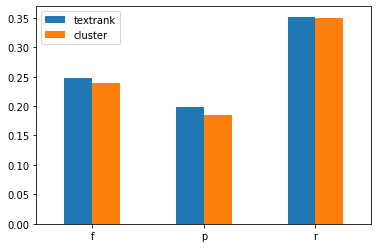

In [16]:
# compare results in bar chart
evaluation.get_barchart(tr_overall, cl_overall, "rouge-1")